In [1]:
# Scraping 실습

In [2]:
# request package

In [ ]:
!conda install requests

In [39]:
import requests

def getDownload( url, param = None, retries = 3 ):
    resp = None
    
    try:
        resp = requests.get( url, params = param ) #, headers = header )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return getDownload( url, param, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    
    return resp

In [2]:
url = 'http://www.crawler-test.com/status_codes/status_100'
getDownload( url )

408
REQUEST_TIMEOUT
{'Accept': '*/*', 'User-Agent': 'python-requests/2.19.1', 'Accept-Encoding': 'gzip, deflate', 'Connection': 'keep-alive'}


<Response [408]>

In [3]:
url = 'http://www.crawler-test.com/status_codes/status_200'
getDownload( url )

<Response [200]>

In [4]:
url = 'http://www.crawler-test.com/status_codes/status_300'
getDownload( url )

404
Not Found
{'Accept': '*/*', 'User-Agent': 'python-requests/2.19.1', 'Accept-Encoding': 'gzip, deflate', 'Connection': 'keep-alive'}


<Response [404]>

In [5]:
url = 'http://www.crawler-test.com/status_codes/status_400'
getDownload( url )

400
Bad Request
{'Accept': '*/*', 'User-Agent': 'python-requests/2.19.1', 'Accept-Encoding': 'gzip, deflate', 'Connection': 'keep-alive'}


<Response [400]>

In [6]:
url = 'http://www.crawler-test.com/status_codes/status_500'
getDownload( url )

Retries : 3
Retries : 2
Retries : 1
500
Internal Server Error
{'Accept': '*/*', 'User-Agent': 'python-requests/2.19.1', 'Accept-Encoding': 'gzip, deflate', 'Connection': 'keep-alive'}


<Response [500]>

In [7]:
import requests

def postDownload( url, data = None, retries = 3 ):
    resp = None
    
    try:
        resp = requests.post( url, data = data, params = param ) #, headers = header )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return getDownload( url, data, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    
    return resp

In [8]:
url = 'http://pythonscraping.com/pages/files/processing.php' 
data = { 'firstname':'테스트', 'lastname':1234 }

In [9]:
html = postDownload( url, data )

print( html.request.body )
print( html.request.headers )

html.text

lastname=1234&firstname=%ED%85%8C%EC%8A%A4%ED%8A%B8
{'Accept': '*/*', 'Content-Type': 'application/x-www-form-urlencoded', 'User-Agent': 'python-requests/2.19.1', 'Accept-Encoding': 'gzip, deflate', 'Connection': 'keep-alive', 'Content-Length': '51'}


'Hello there, 테스트 1234!'

In [13]:
# Cookie

In [10]:
import requests

def postDownloadCookie( url, data = None, cookie = None, retries = 3 ):
    resp = None
    
    try:
        resp = requests.post( url, data = data, cookies = cookie , params = param ) #, headers = header )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return getDownload( url, data, cookie, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    
    return resp

In [11]:
url = 'http://pythonscraping.com/pages/cookies/login.php'
data = { 'username':'test', 'password':'password' }

In [12]:
html = postDownload( url, data )
cookie = html.cookies.get_dict()

html = requests.post( url, cookies = cookie )
html.text

404
Not Found
{'Accept': '*/*', 'Content-Type': 'application/x-www-form-urlencoded', 'User-Agent': 'python-requests/2.19.1', 'Accept-Encoding': 'gzip, deflate', 'Connection': 'keep-alive', 'Content-Length': '31'}


'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"\n  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" version="XHTML+RDFa 1.0" dir="ltr"\n  xmlns:content="http://purl.org/rss/1.0/modules/content/"\n  xmlns:dc="http://purl.org/dc/terms/"\n  xmlns:foaf="http://xmlns.com/foaf/0.1/"\n  xmlns:og="http://ogp.me/ns#"\n  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n  xmlns:sioc="http://rdfs.org/sioc/ns#"\n  xmlns:sioct="http://rdfs.org/sioc/types#"\n  xmlns:skos="http://www.w3.org/2004/02/skos/core#"\n  xmlns:xsd="http://www.w3.org/2001/XMLSchema#">\n\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n  <meta charset="utf-8" />\n<link rel="shortcut icon" href="http://pythonscraping.com/misc/favicon.ico" type="image/vnd.microsoft.icon" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<meta name="MobileOptimized" content="width" />\n<meta name="Generator" content="Drupal 7 (http://drupal.org)" />

In [13]:
session = requests.Session()
data = { 'username':'test', 'password':'password' }

html = session.post( url, data )

html = session.post( url )
html.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"\n  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" version="XHTML+RDFa 1.0" dir="ltr"\n  xmlns:content="http://purl.org/rss/1.0/modules/content/"\n  xmlns:dc="http://purl.org/dc/terms/"\n  xmlns:foaf="http://xmlns.com/foaf/0.1/"\n  xmlns:og="http://ogp.me/ns#"\n  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n  xmlns:sioc="http://rdfs.org/sioc/ns#"\n  xmlns:sioct="http://rdfs.org/sioc/types#"\n  xmlns:skos="http://www.w3.org/2004/02/skos/core#"\n  xmlns:xsd="http://www.w3.org/2001/XMLSchema#">\n\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n  <meta charset="utf-8" />\n<link rel="shortcut icon" href="http://pythonscraping.com/misc/favicon.ico" type="image/vnd.microsoft.icon" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<meta name="MobileOptimized" content="width" />\n<meta name="Generator" content="Drupal 7 (http://drupal.org)" />

In [27]:
# HTML - BeautifulSoup

In [28]:
!conda install beautifulsoup4

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [14]:
from bs4 import BeautifulSoup

In [15]:
html = '''
<!DOCTYPE html>
<html>
    <head>
        <meta charset="utf-8">
        <title>Beautiful Soup Training</title>
    </head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red">Go to page1</a>
                <a class="blue">Go to page2</a>
                <b class="green">Go to page3</a>
                <a class="red">Go to page4</a>
                <c class="yellow">Go to page4</a>
                <d id="gray">Go to page5</a>
                <e id="red">Go to page6</a>
            </p>
        </div>
    </body>
</html>
'''

In [16]:
dom = BeautifulSoup( html, "lxml" )

In [17]:
dom

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<title>Beautiful Soup Training</title>
</head>
<body>
<div id="result">
<p class="row">
<a class="red">Go to page1</a>
<a class="blue">Go to page2</a>
<b class="green">Go to page3
                <a class="red">Go to page4</a>
<c class="yellow">Go to page4
                <d id="gray">Go to page5
                <e id="red">Go to page6
            </e></d></c></b></p>
</div>
</body>
</html>

In [ ]:
# find() / find_all() - tag

In [18]:
dom.find( 'a' )

<a class="red">Go to page1</a>

In [19]:
dom.find_all( 'a' )

[<a class="red">Go to page1</a>,
 <a class="blue">Go to page2</a>,
 <a class="red">Go to page4</a>]

In [20]:
# find() / find_all() - attribute

In [21]:
dom.find( '', { "id":"result" } )

<div id="result">
<p class="row">
<a class="red">Go to page1</a>
<a class="blue">Go to page2</a>
<b class="green">Go to page3
                <a class="red">Go to page4</a>
<c class="yellow">Go to page4
                <d id="gray">Go to page5
                <e id="red">Go to page6
            </e></d></c></b></p>
</div>

In [22]:
dom.find_all( '', { 'id':'result' } )

[<div id="result">
 <p class="row">
 <a class="red">Go to page1</a>
 <a class="blue">Go to page2</a>
 <b class="green">Go to page3
                 <a class="red">Go to page4</a>
 <c class="yellow">Go to page4
                 <d id="gray">Go to page5
                 <e id="red">Go to page6
             </e></d></c></b></p>
 </div>]

In [23]:
dom.find( '', { 'class':'red' } )

<a class="red">Go to page1</a>

In [24]:
dom.find_all( '', { 'class':'red' } )

[<a class="red">Go to page1</a>, <a class="red">Go to page4</a>]

In [25]:
# find() / find_all() - keyword

In [26]:
dom.find( id = 'result' )

<div id="result">
<p class="row">
<a class="red">Go to page1</a>
<a class="blue">Go to page2</a>
<b class="green">Go to page3
                <a class="red">Go to page4</a>
<c class="yellow">Go to page4
                <d id="gray">Go to page5
                <e id="red">Go to page6
            </e></d></c></b></p>
</div>

In [27]:
dom.find_all( id = 'result' )

[<div id="result">
 <p class="row">
 <a class="red">Go to page1</a>
 <a class="blue">Go to page2</a>
 <b class="green">Go to page3
                 <a class="red">Go to page4</a>
 <c class="yellow">Go to page4
                 <d id="gray">Go to page5
                 <e id="red">Go to page6
             </e></d></c></b></p>
 </div>]

In [28]:
# HTML - BeautifulSoup Training

In [29]:
url = "http://pythonscraping.com/pages/page3.html"
html = getDownload( url )
html.text

'<html>\n<head>\n<style>\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n</style>\n</head>\n<body>\n<div id="wrapper">\n<img src="../img/gifts/logo.jpg" style="float:left;">\n<h1>Totally Normal Gifts</h1>\n<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.<p>\nWe haven\'t figured out how to make online shopping carts yet, but you can send us a check to:<br>\n123 Main St.<br>\nAbuja, Nigeria\n</br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</div>\n<table id="giftList">\n<tr><th>\nItem Title\n</th><th>\nDescription\n</th><th>\nCost\n</th><th>\nImage\n</th></tr>\n\n<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfec

In [30]:
dom = BeautifulSoup( html.text, 'lxml' )
dom

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

In [31]:
# id = 'footer' -> div tag

In [33]:
footer = dom.find( 'div', { 'id':'footer' } )
footer

<div id="footer">
© Totally Normal Gifts, Inc. <br/>
+234 (617) 863-0736
</div>

In [34]:
parent = footer.find_parent()
parent.name, parent.attrs

('div', {'id': 'wrapper'})

In [35]:
children = parent.find_all( recursive = False )
for row in children:
    print( row.name, row.attrs )

img {'style': 'float:left;', 'src': '../img/gifts/logo.jpg'}
h1 {}
div {'id': 'content'}
table {'id': 'giftList'}
div {'id': 'footer'}


In [36]:
aList = dom.find_all( 'tr' )
for row in aList:
    print( row.find_all( recursive = False )[ 2 ].text.strip() )

Cost
$15.00
$10,000.52
$10,005.00
$0.50
$1.50


<!DOCTYPE html>
<html lang="ko"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>python - Google 검색</title><script nonce="/IRz2htWfa45WZfysAYn7Q==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{
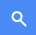
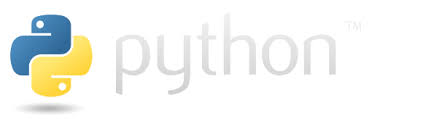
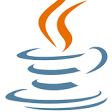
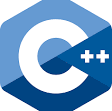
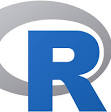
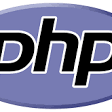

In [43]:
url = 'https://www.google.com/search'
html = getDownload( url, param = { 'q':'python' } )
dom = BeautifulSoup( html.text, 'lxml' )

dom

In [ ]:
for tag in dom.find_all( '', { 'class':'r' } ):
    print( tab.find( 'h3' ).text )